**Este notebook apresenta um tutorial para a criação de gráfico de barras horizontais agrupadas utilizando Python, conforme o exemplo abaixo. Diferentes palestas de cores acessíveis para daltônicos são utilizadas.**

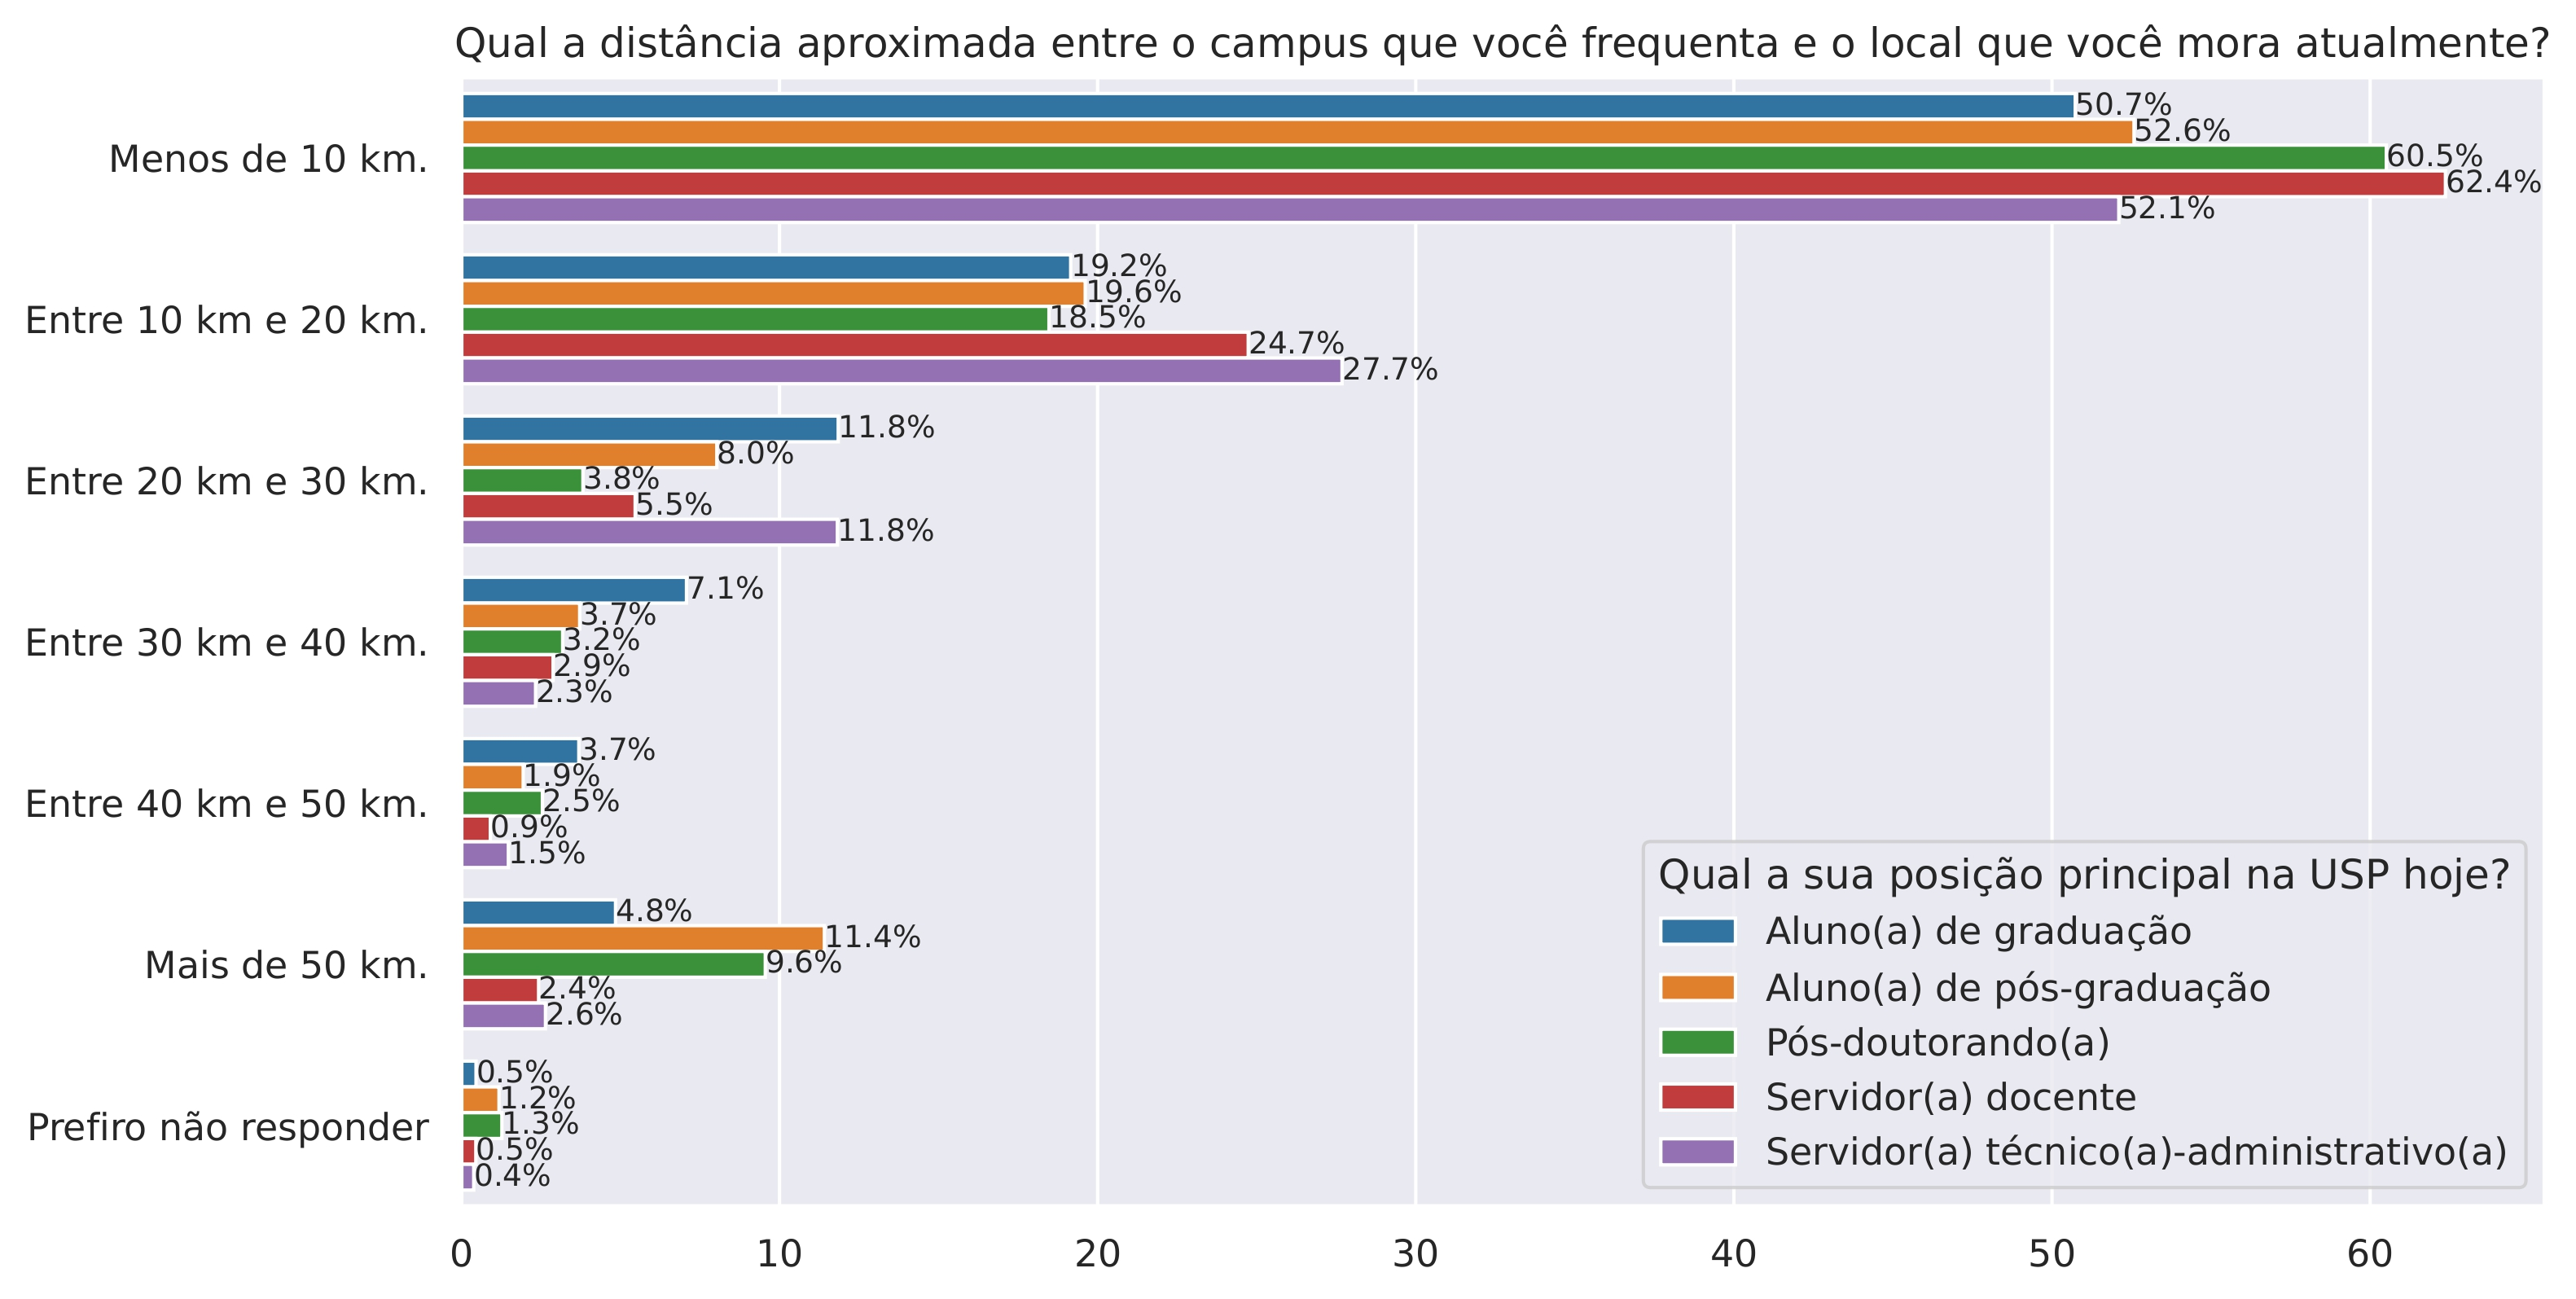

**Figura 4.1.10: Distância aproximada até o campus na comunidade USP (QPRIP, 2024).**



> Veja  mais sobre acessibilidade cromática para daltonismo: https://repositorio.ufsm.br/bitstream/handle/1/24809/guia-modo-padr%C3%A3o.pdf?sequence=3&isAllowed=y





---



**Passo 1: Preparar os dados**

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar base de dados
df = pd.read_csv('exemplos_QPRIP.csv')

In [3]:
# Este tipo de gráfico precisa, por exemplo, da posição institucional do respondente
# Para manter o anonimato, esses dados são sintéticos, ou seja, falsos

# Posições institucionais pré-definidas
posicoes = [
    'Aluno(a) de graduação',
    'Aluno(a) de pós-graduação',
    'Pós-doutorando(a)',
    'Servidor(a) docente',
    'Servidor(a) técnico(a)-administrativo(a)'
]

# Atribui uma posição aleatória para cada registro
df['Qual a sua posição principal na USP hoje?'] = np.random.choice(posicoes, size=len(df))

In [4]:
# Definir coluna alvo
coluna_alvo = 'Qual a distância aproximada entre o campus que você frequenta e o local que você mora atualmente?'

# Definir ordem dos valores no grafico
ordem_grafico = [
                 'Menos de 10 km.', 'Entre 10 km e 20 km.', 'Entre 20 km e 30 km.', 'Entre 30 km e 40 km.',
                 'Entre 40 km e 50 km.', 'Mais de 50 km.', 'Prefiro não responder',
                ]

# Definir título do gráfico
titulo_grafico = 'Qual a distância aproximada entre o campus que você frequenta e o local que você mora atualmente?'

---

**Passo 2: Criação da função**

In [12]:
def plot_bar_chart(dados, questao, respostas, titulo, paleta):
    """
    Cria um gráfico de barras horizontais agrupadas e retorna o objeto Figure.
    """
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots(figsize=(11, 6))
    plt.rc('xtick', labelsize=7)

    # Frequências relativas
    tab = pd.crosstab(dados['Qual a sua posição principal na USP hoje?'],
                      dados[questao], normalize='index') * 100
    tab.reset_index(inplace=True)

    # Reestrutura dados
    tab = pd.melt(tab, id_vars=['Qual a sua posição principal na USP hoje?'], value_vars=respostas)
    tab.rename(columns={'value': 'Respostas'}, inplace=True)

    # Filtra valores pequenos, para não poluir o gráfico
    tab.loc[tab['Respostas'] < 0.05, 'Respostas'] = np.nan

    # Plota
    sns.barplot(data=tab,
                y=questao,
                x='Respostas',
                hue='Qual a sua posição principal na USP hoje?',
                palette=paleta,
                ax=ax)

    # Adiciona rótulos
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=9)

    # Ajustes finais
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(titulo, fontsize=12)
    ax.tick_params(axis='both', labelsize=11)

    return fig



---



**Parte 3: Gerar gráfico de barras horizontais agrupadas**

/tmp/ipython-input-12-990256888.py:22: UserWarning: The palette list has more values (14) than needed (5), which may not be intended.
  sns.barplot(data=tab,


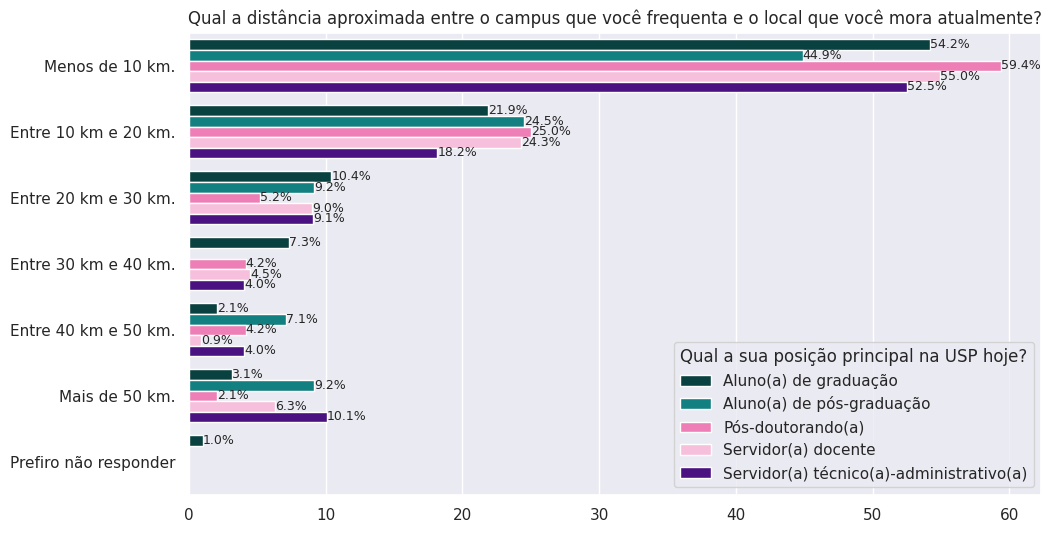

In [14]:
# Cores da paleta acessíveis para daltônicos
paleta = [
    "#004949", "#009292", "#ff6db6", "#ffb6db",
    "#490092", "#006ddb", "#b66dff", "#6db6ff", "#b6dbff",
    "#920000", "#924900", "#db6d00", "#24ff24", "#ffff6d"
]

# Chamada da função
fig = plot_bar_chart(df, coluna_alvo, ordem_grafico, titulo_grafico, paleta)
fig.show()

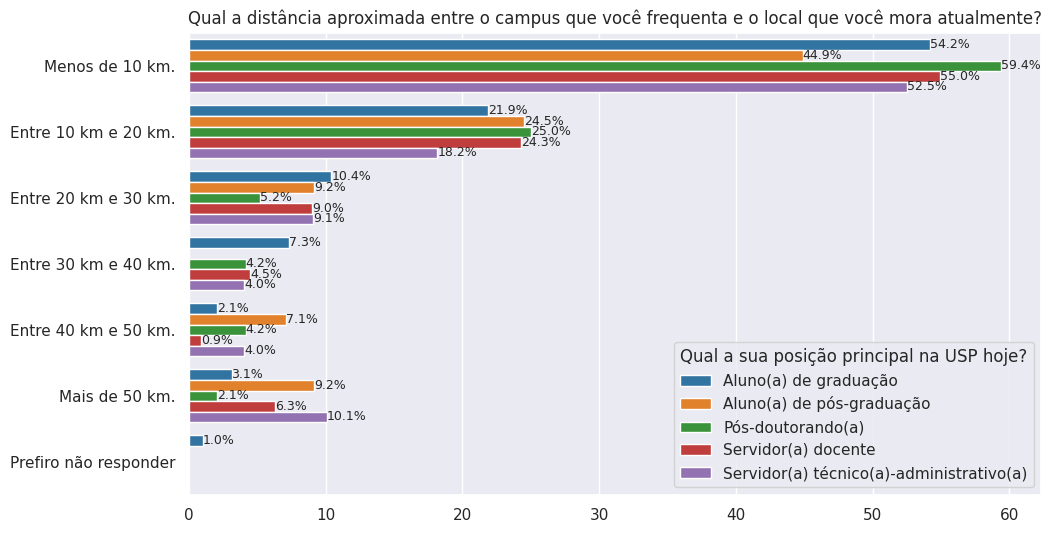

In [13]:
# Paleta do seaborn
paleta = sns.color_palette("tab10", 5)

# Chamada da função
fig = plot_bar_chart(df, coluna_alvo, ordem_grafico, titulo_grafico, paleta)
fig.show()

In [11]:
# Salvar em pdf acessível para leitores de telas
fig.savefig('distancia.pdf', bbox_inches='tight', dpi=300)